Importing all the libraries and Loading the dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DAFFODIL INTERNATIONAL UNIVERSITY/fall24/Xoy/Data MIning & ML Lab/data Analysis/Dataset/stackoverflow_full.csv')

In [ ]:
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


Exploratory Data Analysis

In [ ]:

df.drop(columns = 'Unnamed: 0', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   Country         73462 non-null  object 
 10  PreviousSalary  73462 non-null  float64
 11  HaveWorkedWith  73399 non-null  object 
 12  ComputerSkills  73462 non-null  int64  
 13  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 7.8+ MB


In [ ]:
df.describe()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


In [ ]:

df.select_dtypes(include='object').nunique()

,0
Age,2
Accessibility,2
EdLevel,5
Gender,3
MentalHealth,2
MainBranch,2
Country,172
HaveWorkedWith,69980


In [ ]:

df.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

In [ ]:

def segment_country(country):
    if country in ['United States of America', 'Canada', 'Mexico']:
        return 'NorthAmerica'
    elif country in ['United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']:
        return 'Europe'
    elif country in ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']:
        return 'South America'
    elif country in ['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']:
        return 'Australia'
    else:
        return 'Others'

df['Continent'] = df['Country'].apply(segment_country)

In [ ]:
df.Continent.unique()

array(['Europe', 'NorthAmerica', 'Asia', 'Others', 'South America',
       'Australia'], dtype=object)

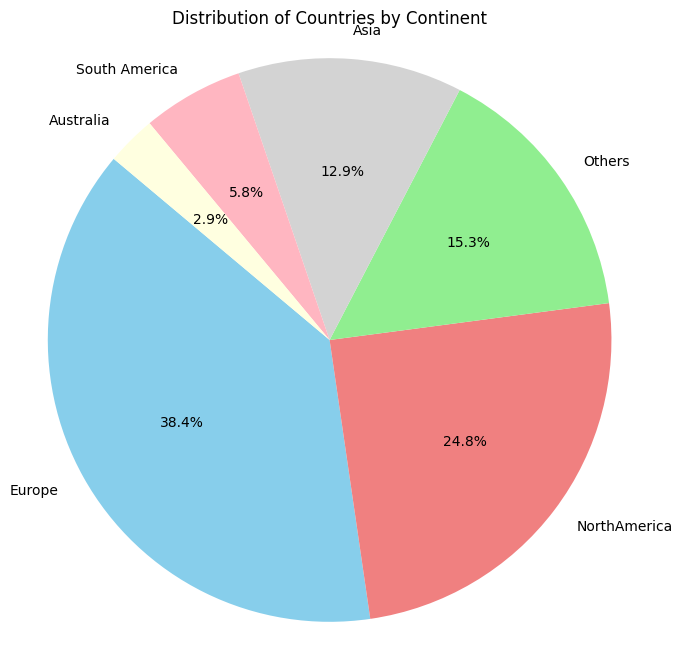

In [ ]:
continent_counts = df['Continent'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightgray', 'lightpink', 'lightyellow'])
plt.title('Distribution of Countries by Continent')
plt.axis('equal')


plt.show()

In [ ]:

df.drop(columns = 'Country', inplace=True)

df.drop(columns = 'YearsCodePro', inplace=True)

In [ ]:
df.columns

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'PreviousSalary',
       'HaveWorkedWith', 'ComputerSkills', 'Employed', 'Continent'],
      dtype='object')

In [ ]:

missing_values = df.isna().sum()


print(missing_values)

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
Continent          0
dtype: int64


In [ ]:
df.HaveWorkedWith.unique()

array(['C++;Python;Git;PostgreSQL',
       'Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript;Git;Express;React.js;Vue.js;AWS;PostgreSQL',
       'C;C++;Java;Perl;Ruby;Git;Ruby on Rails', ...,
       'C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;AWS;DigitalOcean;Managed Hosting;MySQL;PostgreSQL',
       'HTML/CSS;JavaScript;TypeScript;Docker;Express;Node.js;React.js;AWS;Firebase;Heroku;MongoDB;PostgreSQL',
       'C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn;Angular;ASP.NET;jQuery;React.js;AWS;DynamoDB;Microsoft SQL Server;SQLite'],
      dtype=object)

In [ ]:
categories = {
    'Languages': ['JavaScript', 'TypeScript', 'Python', 'C#', 'PHP', 'Java', 'HTML/CSS', 'SQL', 'Bash/Shell/PowerShell', 'C++', 'Go', 'C', 'Kotlin', 'Ruby', 'Rust', 'Swift', 'Assembly', 'R', 'VBA', 'Objective-C', 'Scala', 'Dart', 'Perl', 'Delphi', 'Groovy'],
    'Frameworks': ['React.js', 'Node.js', '.NET', 'Angular', 'Spring', 'Vue.js', 'Django', 'Flask', 'Laravel', 'Express', 'Ruby on Rails', 'AngularJS', 'jQuery', 'ASP.NET Core ', 'Symfony', 'Drupal', 'FastAPI'],
    'Databases': ['PostgreSQL', 'MySQL', 'MongoDB', 'Redis', 'SQLite', 'Microsoft SQL Server', 'Elasticsearch', 'Firebase', 'MariaDB', 'Oracle', 'DynamoDB', 'Cassandra', 'Couchbase'],
    'Cloud': ['AWS', 'Azure', 'Google Cloud', 'Heroku', 'DigitalOcean', 'IBM Cloud or Watson', 'Oracle Cloud Infrastructure']
}
df['HaveWorkedWith'] = df['HaveWorkedWith'].fillna('').astype(str)

def categorize_technologies(tech_list, categories):
    result = {key: 0 for key in categories}
    for tech in tech_list.split(';'):
        for category, items in categories.items():
            if tech in items:
                result[category] += 1
    return pd.Series(result)

df_tech_counts = df['HaveWorkedWith'].apply(lambda x: categorize_technologies(x, categories))


df = pd.concat([df, df_tech_counts], axis=1)


In [ ]:
df.columns

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'PreviousSalary',
       'HaveWorkedWith', 'ComputerSkills', 'Employed', 'Continent',
       'Languages', 'Frameworks', 'Databases', 'Cloud'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
PreviousSalary,0
HaveWorkedWith,0


In [ ]:
print(df.Languages.unique())
print(df.Frameworks.unique())
print(df.Databases.unique())
print(df.Cloud.unique())

[ 2  4  5  6  1  3  8  7 14 10  9  0 13 12 11 16 18 15 22 17 20 24 19 23]
[ 0  4  1  3  2 11  7  5  6  8 10  9 14 12 13 15]
[ 1  0  2  4  3  8  5  9  6  7 13 10 11 12]
[0 1 2 3 4 5 6]


In [ ]:
df.drop(columns = 'HaveWorkedWith', inplace=True)

In [ ]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent,Languages,Frameworks,Databases,Cloud
0,<35,No,Master,1,Man,No,Dev,7,51552.0,4,0,Europe,2,0,1,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,46482.0,12,1,Europe,4,4,1,1
2,<35,No,Master,1,Man,No,Dev,15,77290.0,7,0,Europe,5,1,0,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,46135.0,13,0,NorthAmerica,5,3,2,1
4,>35,No,PhD,0,Man,No,NotDev,40,160932.0,2,0,Asia,2,0,0,0


Visualizing the Data Attributes

Age Distribution

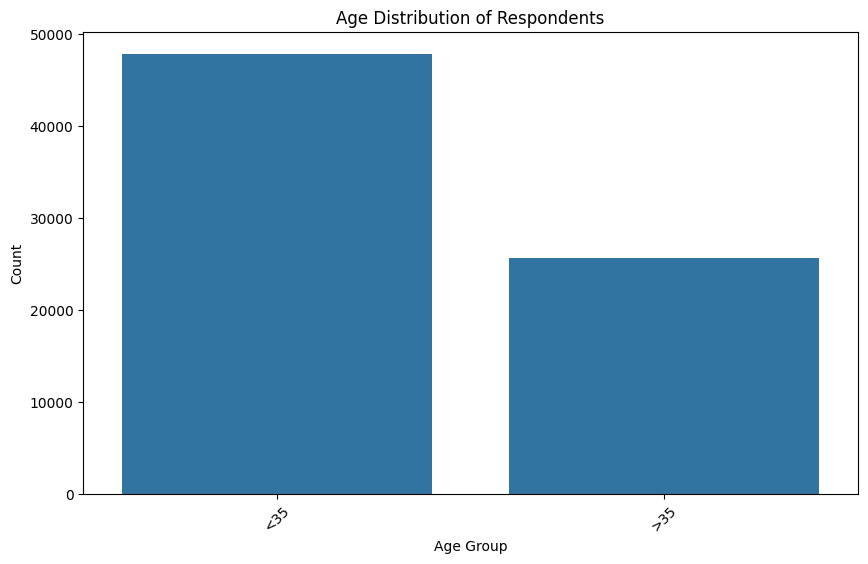

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', order=['<35', '>35'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution of Respondents')
plt.xticks(rotation=45)
plt.show()

Distribution of Education Levels

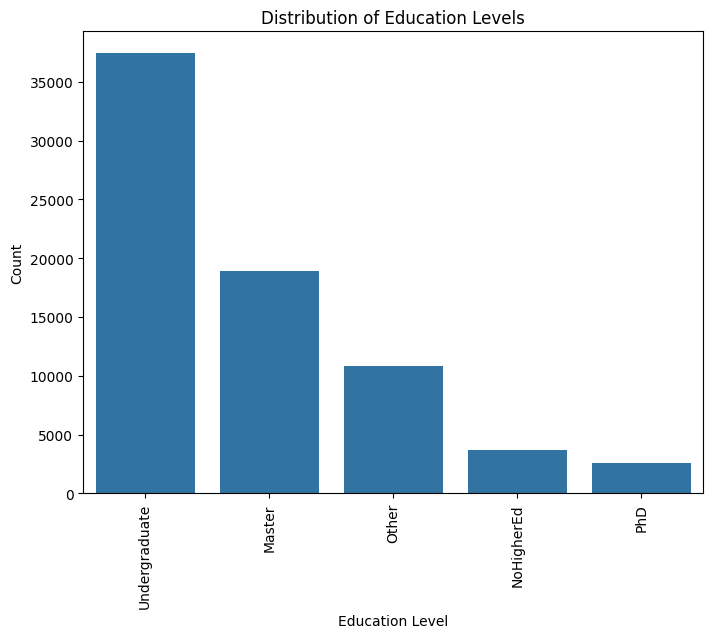

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EdLevel', order=df['EdLevel'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

Distribution of Employment Status

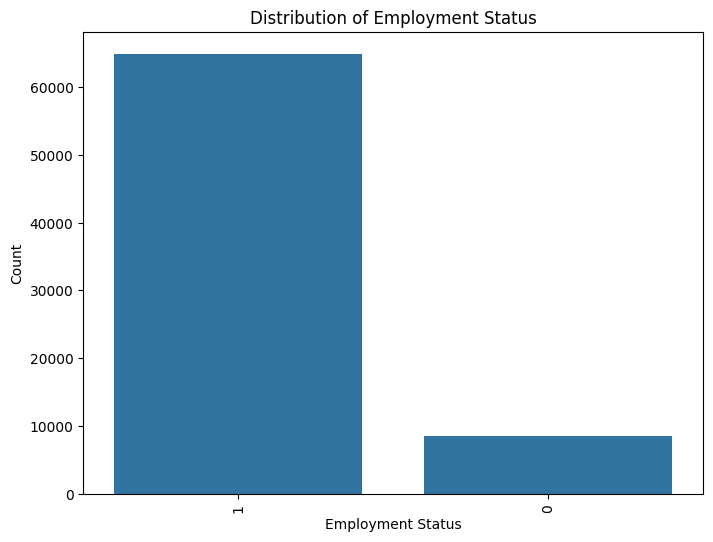

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Distribution of Employment Status')
plt.show()

'Relationship Between Age and Employment Status'

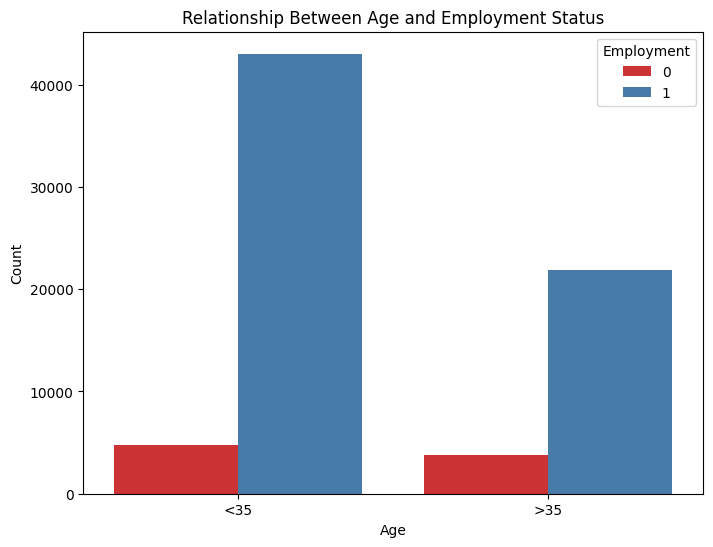

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age', hue='Employment', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Relationship Between Age and Employment Status')
plt.show()

Distribution of Countries by Continent

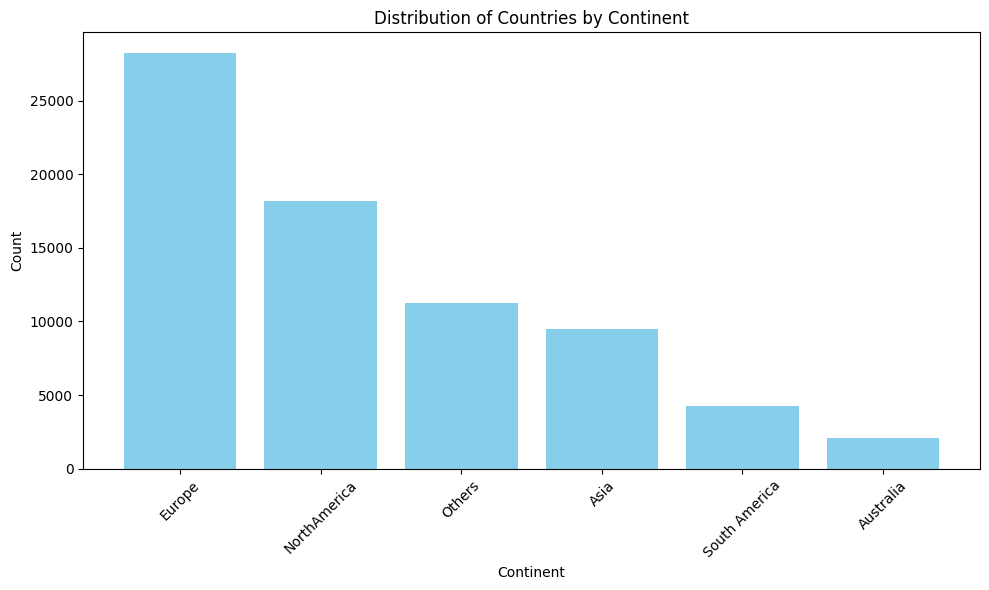

In [ ]:
continent_counts = df['Continent'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(continent_counts.index, continent_counts.values, color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Distribution of Countries by Continent')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Distribution of Target variable "Employed"

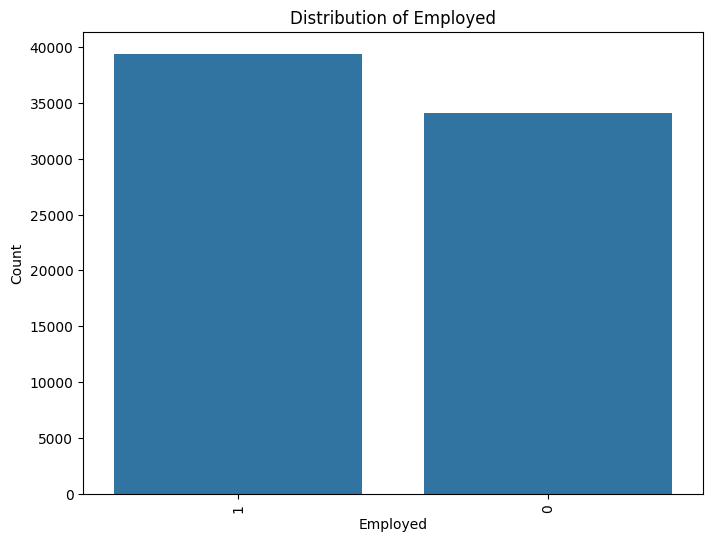

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employed', order=df['Employed'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Employed')
plt.ylabel('Count')
plt.title('Distribution of Employed')
plt.show()

Average Previous Salary by Continent

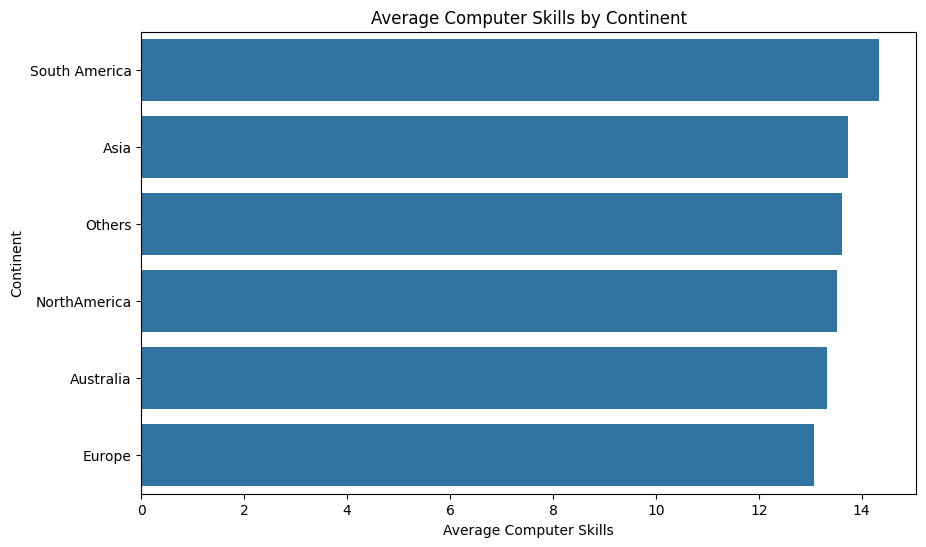

In [ ]:

continent_computer_skills = df.groupby('Continent')['ComputerSkills'].mean().reset_index()

continent_computer_skills = continent_computer_skills.sort_values(by='ComputerSkills', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=continent_computer_skills, x='ComputerSkills', y='Continent')
plt.xlabel('Average Computer Skills')
plt.ylabel('Continent')
plt.title('Average Computer Skills by Continent')
plt.show()

Continents with Highest Employment Percentage

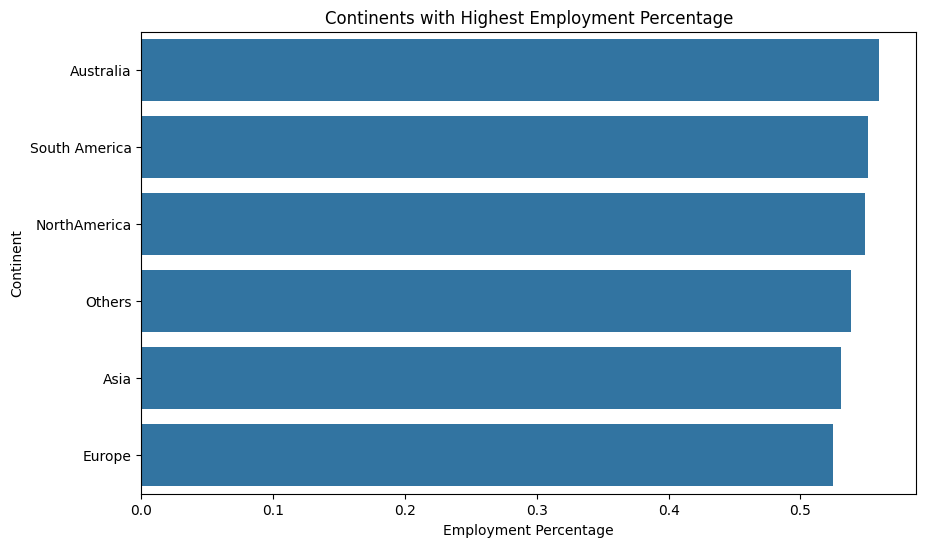

In [ ]:

continent_employment = df.groupby('Continent')['Employed'].mean().reset_index()

continent_employment = continent_employment.sort_values(by='Employed', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=continent_employment, x='Employed', y='Continent')
plt.xlabel('Employment Percentage')
plt.ylabel('Continent')
plt.title('Continents with Highest Employment Percentage')
plt.show()

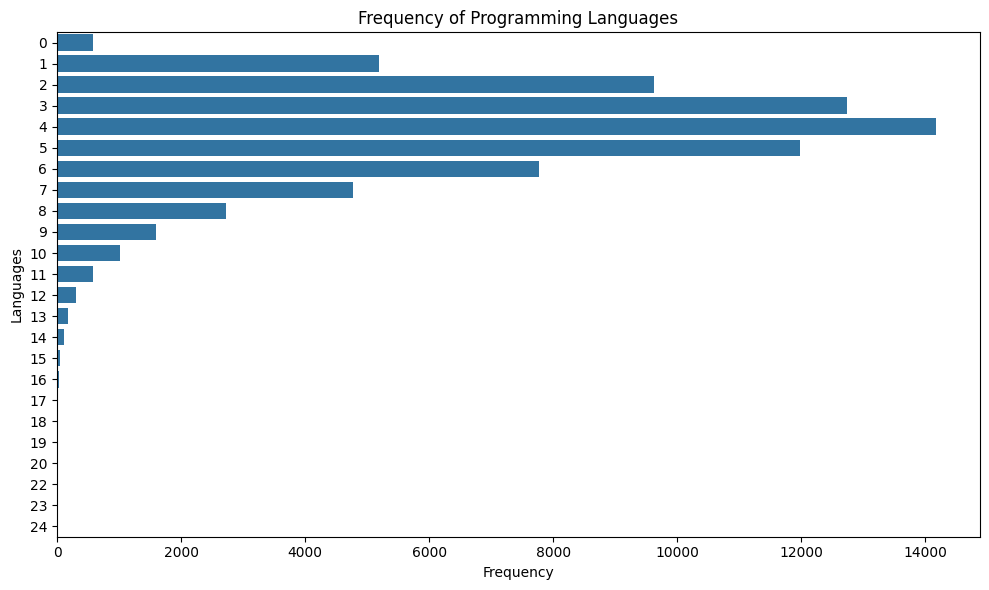

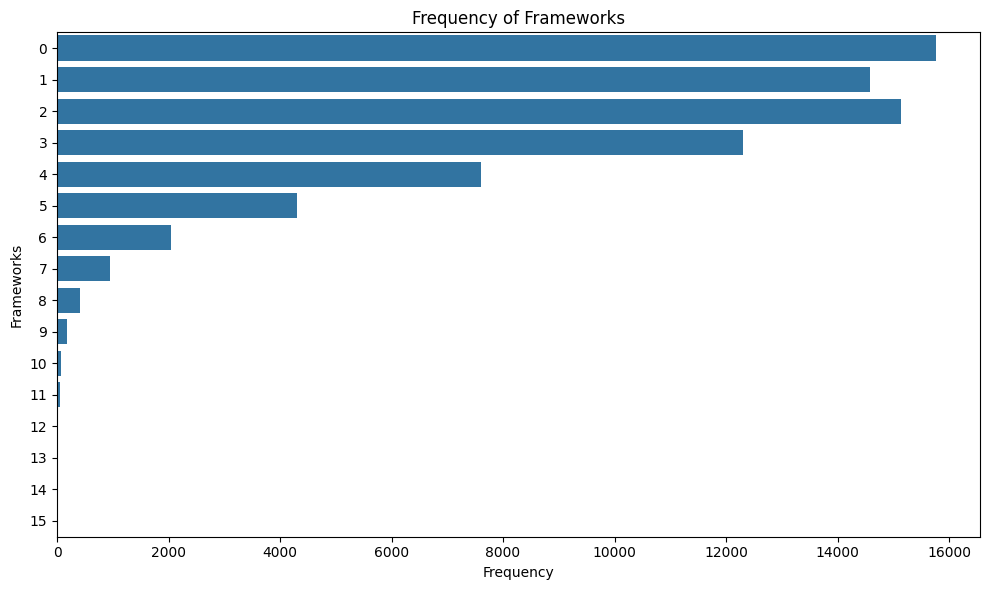

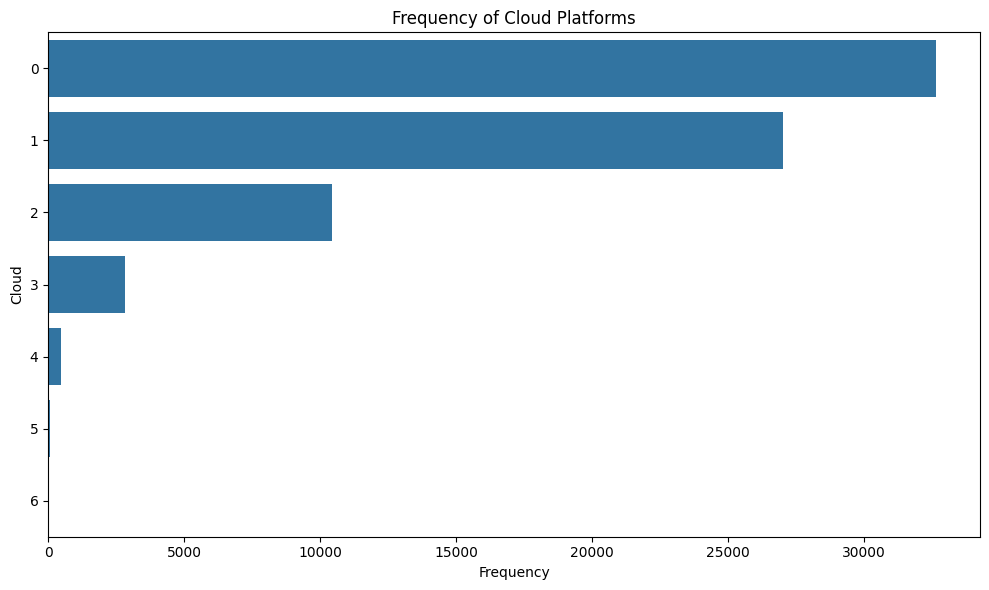

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_horizontal_bar_chart(data, column_name, title):

    category_counts = data[column_name].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.values, y=category_counts.index, orient='h')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel(column_name)
    plt.tight_layout()
    plt.show()

create_horizontal_bar_chart(df, 'Languages', 'Frequency of Programming Languages')
create_horizontal_bar_chart(df, 'Frameworks', 'Frequency of Frameworks')
create_horizontal_bar_chart(df, 'Cloud', 'Frequency of Cloud Platforms')

Check the Co-relation of the Attributes

In [ ]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent,Languages,Frameworks,Databases,Cloud
0,<35,No,Master,1,Man,No,Dev,7,51552.0,4,0,Europe,2,0,1,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,46482.0,12,1,Europe,4,4,1,1
2,<35,No,Master,1,Man,No,Dev,15,77290.0,7,0,Europe,5,1,0,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,46135.0,13,0,NorthAmerica,5,3,2,1
4,>35,No,PhD,0,Man,No,NotDev,40,160932.0,2,0,Asia,2,0,0,0


In [ ]:

df_copy = df.copy()

label_encoder = LabelEncoder()
categorical_columns = ['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Continent']
for col in categorical_columns:
    df_copy[col] = label_encoder.fit_transform(df[col])

In [ ]:
df_copy.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent,Languages,Frameworks,Databases,Cloud
0,0,0,0,1,0,0,0,7,51552.0,4,0,2,2,0,1,0
1,0,0,4,1,0,0,0,12,46482.0,12,1,2,4,4,1,1
2,0,0,0,1,0,0,0,15,77290.0,7,0,2,5,1,0,0
3,0,0,4,1,0,0,0,9,46135.0,13,0,3,5,3,2,1
4,1,0,3,0,0,0,1,40,160932.0,2,0,0,2,0,0,0


In [ ]:

correlation_matrix = df_copy.corr()

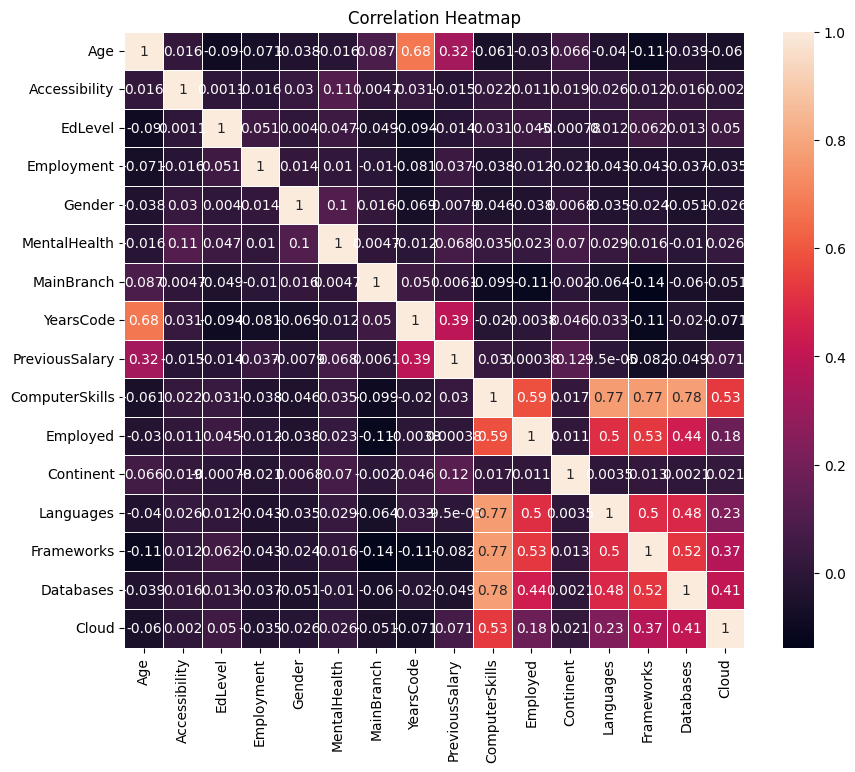

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Check for class imbalance and sampling, Remove outliers

In [ ]:

df_copy['Employed'].value_counts()

,count
Employed,
1,39392
0,34070


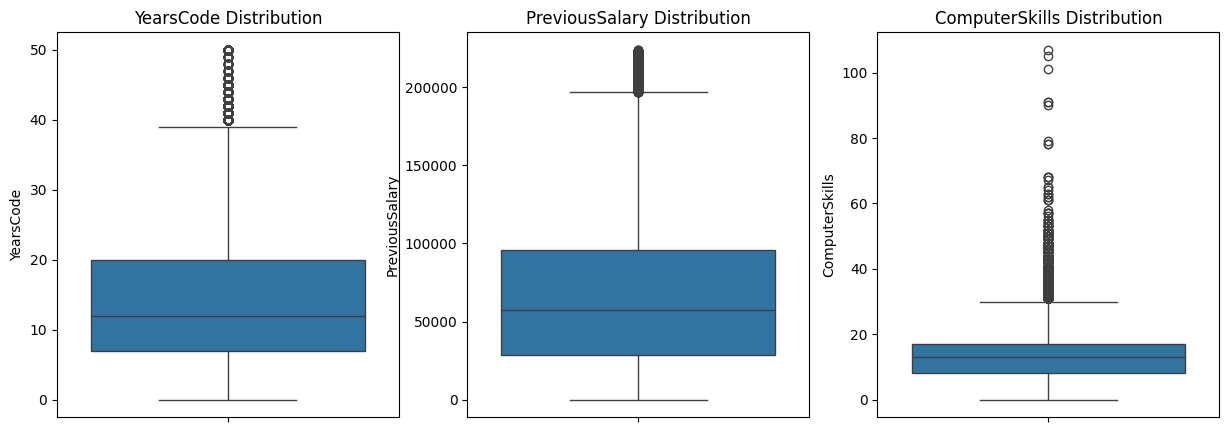

In [ ]:

plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.boxplot(data=df_copy, y='YearsCode', orient='vertical')
plt.title('YearsCode Distribution')
plt.subplot(132)
sns.boxplot(data=df_copy, y='PreviousSalary', orient='vertical')
plt.title('PreviousSalary Distribution')
plt.subplot(133)
sns.boxplot(data=df_copy, y='ComputerSkills', orient='vertical')
plt.title('ComputerSkills Distribution')
plt.show()

In [ ]:

def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

df_copy = remove_outliers_iqr(df_copy, 'YearsCode')
df_copy = remove_outliers_iqr(df_copy, 'PreviousSalary')
df_copy = remove_outliers_iqr(df_copy, 'ComputerSkills')

In [ ]:
df_copy.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent,Languages,Frameworks,Databases,Cloud
0,0,0,0,1,0,0,0,7,51552.0,4,0,2,2,0,1,0
1,0,0,4,1,0,0,0,12,46482.0,12,1,2,4,4,1,1
2,0,0,0,1,0,0,0,15,77290.0,7,0,2,5,1,0,0
3,0,0,4,1,0,0,0,9,46135.0,13,0,3,5,3,2,1
5,0,0,0,1,0,0,0,9,38915.0,5,0,2,2,0,1,0


Create a train-test split

In [ ]:

X = df_copy.drop("Employed", axis=1)
y = df_copy["Employed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 54576
Testing set size: 13645


MODEL FITTING

Logistic Regression

In [ ]:

logistic_regression = LogisticRegression(random_state=0,solver='liblinear')
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)


y_scores_lr = logistic_regression.predict_proba(X_train)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_scores_lr)
auc_lr = auc(fpr_lr, tpr_lr)

In [ ]:

print(f'Logistic Regression - AUC(Train): {auc_lr:.4f}')
print(f'Logistic Regression - AUC(Test): {roc_auc_score(y_test, y_pred_lr):.4f}')

Logistic Regression - AUC(Train): 0.8652
Logistic Regression - AUC(Test): 0.7699


In [ ]:
from sklearn.metrics import classification_report

y_pred_lr_train = logistic_regression.predict(X_train)
print("\nLogistic Regression Classification Report (Train Set):")
print(classification_report(y_train, y_pred_lr_train))


Logistic Regression Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.79      0.74      0.76     25845
           1       0.78      0.82      0.80     28731

    accuracy                           0.78     54576
   macro avg       0.78      0.78      0.78     54576
weighted avg       0.78      0.78      0.78     54576



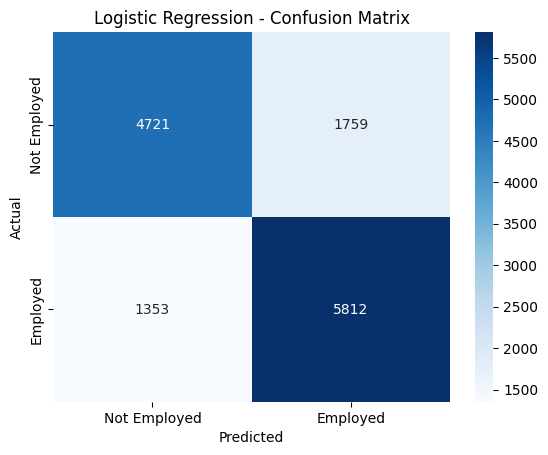

In [ ]:

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

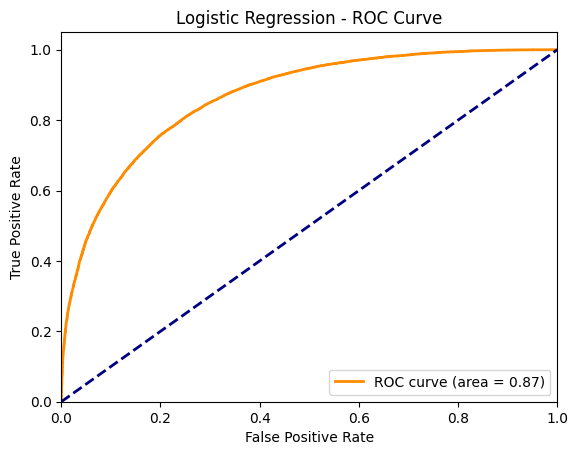

In [ ]:

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('Accuracy: ',(accuracy_score(y_test, y_pred_lr)))
print('F-1 Score : ',(f1_score(y_test, y_pred_lr, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_lr, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_lr, average='micro')))

Accuracy:  0.771931110296812
F-1 Score :  0.771931110296812
Precision Score :  0.771931110296812
Recall Score :  0.771931110296812


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      6480
           1       0.77      0.81      0.79      7165

    accuracy                           0.77     13645
   macro avg       0.77      0.77      0.77     13645
weighted avg       0.77      0.77      0.77     13645



Decision Tree Classifier

In [ ]:

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [ ]:

best_decision_tree = DecisionTreeClassifier(random_state=42, **best_params)
best_decision_tree.fit(X_train, y_train)


y_pred_dt = best_decision_tree.predict(X_test)

In [ ]:

y_scores_dt = best_decision_tree.predict_proba(X_train)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_scores_dt)
auc_dt = auc(fpr_dt, tpr_dt)

In [ ]:

print(f'Best Hyperparameters for Decision Tree: {best_params}')
print(f'Decision Tree - AUC (Train): {auc_dt:.4f}')

Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree - AUC (Train): 0.9047


In [ ]:
from sklearn.metrics import classification_report

y_pred_dt_train = best_decision_tree.predict(X_train)
print("\nDecision Tree Classification Report (Train Set):")
print(classification_report(y_train, y_pred_dt_train))


Decision Tree Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     25845
           1       0.82      0.84      0.83     28731

    accuracy                           0.82     54576
   macro avg       0.82      0.82      0.82     54576
weighted avg       0.82      0.82      0.82     54576



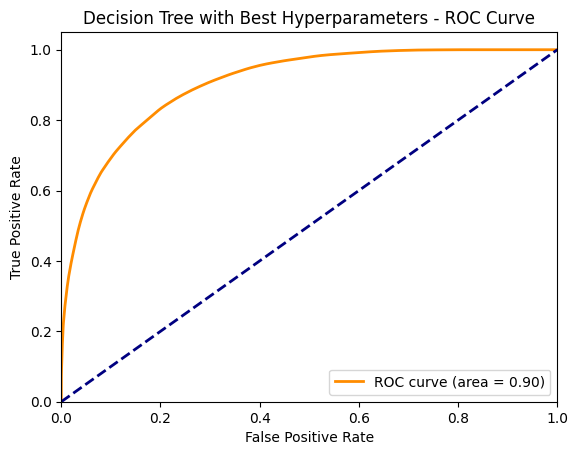

In [ ]:

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree with Best Hyperparameters - ROC Curve')
plt.legend(loc='lower right')
plt.show()

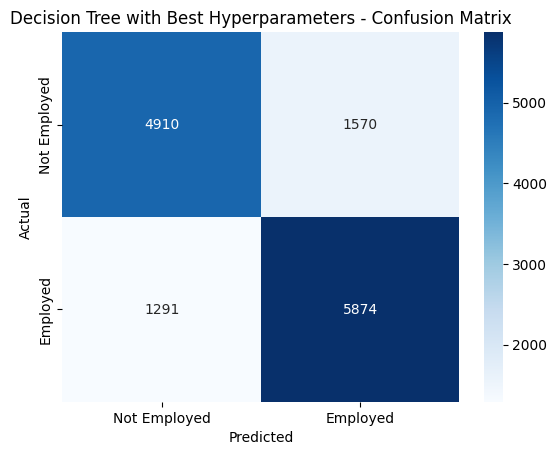

In [ ]:

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure()
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree with Best Hyperparameters - Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      6480
           1       0.79      0.82      0.80      7165

    accuracy                           0.79     13645
   macro avg       0.79      0.79      0.79     13645
weighted avg       0.79      0.79      0.79     13645



XGBoost Classifier

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}


xgboost = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_xgb = grid_search.best_params_

In [ ]:

best_xgboost = XGBClassifier(random_state=42, **best_params_xgb)
best_xgboost.fit(X_train, y_train)

y_pred_xgb = best_xgboost.predict(X_test)

In [ ]:

y_scores_xgb = best_xgboost.predict_proba(X_train)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, y_scores_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

In [ ]:

print(f'Best Hyperparameters for XGBoost: {best_params_xgb}')
print(f'XGBoost - AUC with Best Hyperparameters: {auc_xgb:.4f}')

Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGBoost - AUC with Best Hyperparameters: 0.8934


In [ ]:
from sklearn.metrics import classification_report

y_pred_xgb_train = best_xgboost.predict(X_train)
print("\nXGBoost Classification Report (Train Set):")
print(classification_report(y_train, y_pred_xgb_train))


XGBoost Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     25845
           1       0.80      0.84      0.82     28731

    accuracy                           0.81     54576
   macro avg       0.81      0.80      0.81     54576
weighted avg       0.81      0.81      0.81     54576



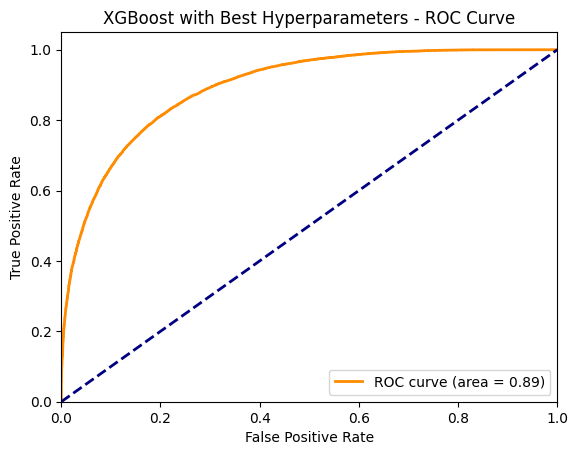

In [ ]:

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost with Best Hyperparameters - ROC Curve')
plt.legend(loc='lower right')
plt.show()

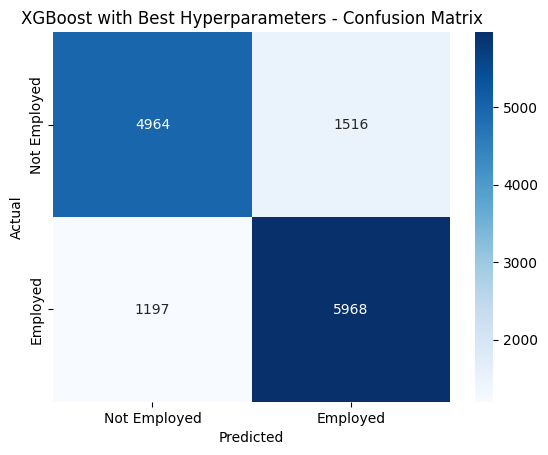

In [ ]:

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure()
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost with Best Hyperparameters - Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      6480
           1       0.80      0.83      0.81      7165

    accuracy                           0.80     13645
   macro avg       0.80      0.80      0.80     13645
weighted avg       0.80      0.80      0.80     13645



Random forest

In [ ]:
from joblib import Parallel, delayed

In [ ]:
def custom_scoring_function(estimator, X, y):


       with Parallel(n_jobs=-1, timeout=60) as parallel:
           scores = parallel(delayed(roc_auc_score)(y, estimator.predict_proba(X)[:, 1]) for _ in range(1))


       return scores[0]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid,
                               cv=5, scoring=custom_scoring_function)


grid_search.fit(X_train, y_train)


best_params_rf = grid_search.best_params_


best_random_forest = RandomForestClassifier(random_state=42, **best_params_rf)
best_random_forest.fit(X_train, y_train)

y_pred_rf = best_random_forest.predict(X_test)



In [ ]:
y_scores_rf = best_random_forest.predict_proba(X_train)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)
auc_rf= auc(fpr_rf, tpr_rf)

In [ ]:
from sklearn.metrics import classification_report

y_pred_rf_train = best_random_forest.predict(X_train)
print("\nRandom Forest Classification Report (Train Set):")
print(classification_report(y_train, y_pred_rf_train))


Random Forest Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     25845
           1       0.81      0.85      0.83     28731

    accuracy                           0.82     54576
   macro avg       0.82      0.82      0.82     54576
weighted avg       0.82      0.82      0.82     54576



In [ ]:

print(f'Best Hyperparameters for Random forest: {best_params_rf}')
print(f'Random Forest - AUC with Best Hyperparameters: {auc_rf:.4f}')

Best Hyperparameters for Random forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest - AUC with Best Hyperparameters: 0.9040


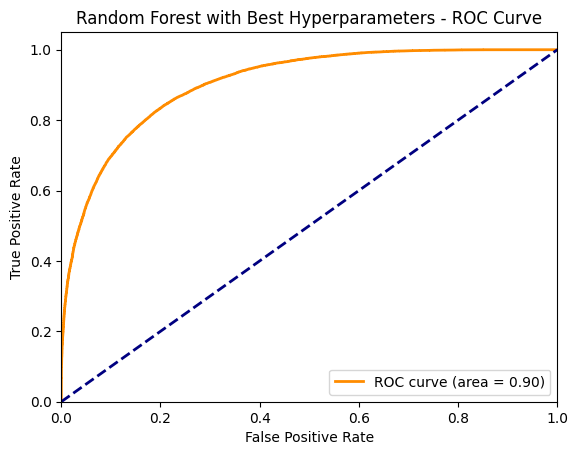

In [ ]:

plt.figure
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with Best Hyperparameters - ROC Curve')
plt.legend(loc='lower right')
plt.show()

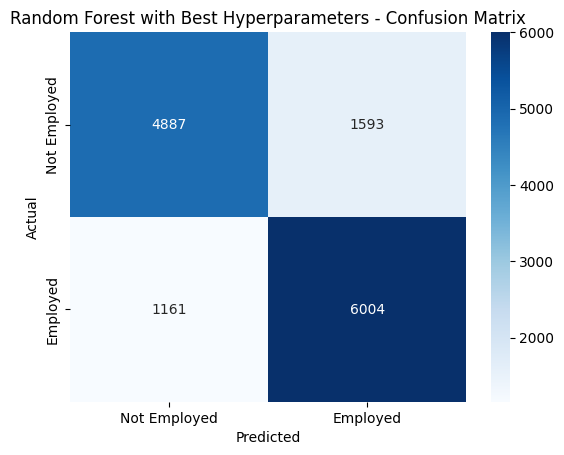

In [ ]:

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with Best Hyperparameters - Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      6480
           1       0.79      0.84      0.81      7165

    accuracy                           0.80     13645
   macro avg       0.80      0.80      0.80     13645
weighted avg       0.80      0.80      0.80     13645



PLOT THE AUC FOR ALL MODELS

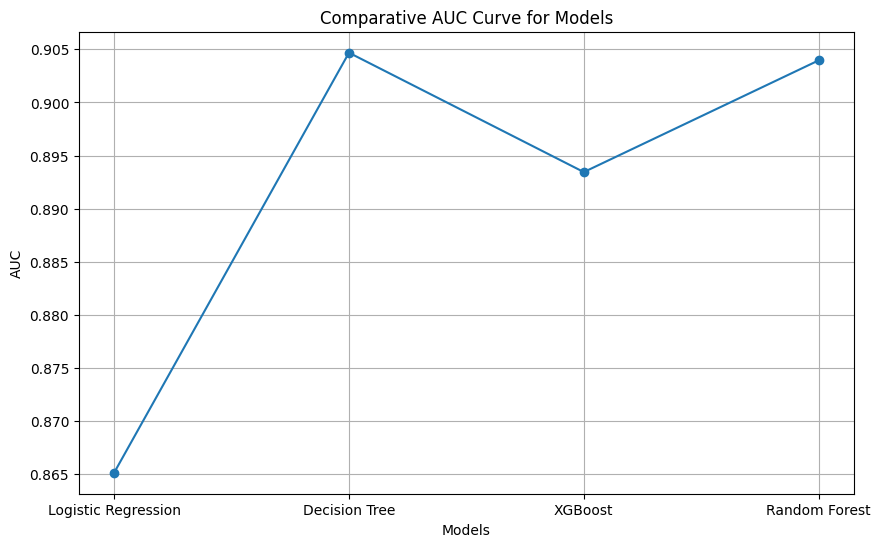

In [ ]:

auc_values = [auc_lr, auc_dt, auc_xgb, auc_rf]


model_names = ["Logistic Regression", "Decision Tree", "XGBoost", "Random Forest"]

plt.figure(figsize=(10, 6))
plt.plot(model_names, auc_values, marker='o', linestyle='-')
plt.title('Comparative AUC Curve for Models')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.grid(True)
plt.show()